In [1]:
!pwd

/media/atem/Data/HSE_videos/4_DLA/template/src/notebooks


In [2]:
%cd ../..

/media/atem/Data/HSE_videos/4_DLA/template


In [3]:
import random

## Test Dataset

In [4]:
from omegaconf import OmegaConf
from hydra.utils import instantiate
from hydra import initialize, compose

with initialize(config_path="../configs", version_base=None):
    cfg = compose(config_name="baseline.yaml")
    dataset = instantiate(cfg.datasets.train)

In [5]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

def plot_spec_and_phase(magnitude, phase, title_prefix=""):
    """Визуализация спектрограммы и фазы рядом"""
    mag = magnitude.squeeze().cpu().numpy()
    phs = phase.squeeze().cpu().numpy()

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    im0 = axes[0].imshow(20 * np.log10(mag + 1e-8), aspect='auto', origin='lower')
    axes[0].set_title(f"{title_prefix} Magnitude (dB)")
    plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    im1 = axes[1].imshow(phs, aspect='auto', origin='lower', cmap='twilight')
    axes[1].set_title(f"{title_prefix} Phase")
    plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()


def listen_samples(dataset, k=3, sample_rate=16000):
    """
    Случайно выбирает k примеров из датасета и показывает:
      - аудио original mix
      - аудио mix после аугментаций
      - спектрограмму и фазу mix
      - аудио source 1 + его спектр и фазу
      - аудио source 2 + его спектр и фазу
    """
    indices = random.sample(range(len(dataset)), k)
    print(f"🎧 Прослушиваем {k} случайных примеров: {indices}\n")

    for idx in indices:
        example = dataset[idx]

        mix_orig = example["audio_original"].squeeze().cpu()
        mix_aug = example["audio"].squeeze().cpu()
        mix_mag = example["spectrogram"].squeeze().cpu()
        mix_phase = example["phase"].squeeze().cpu()

        src1_dict = example["sources"][0]
        src2_dict = example["sources"][1]

        src1_audio = src1_dict[list(src1_dict.keys())[0]].squeeze().cpu()
        src1_mag = src1_dict[list(src1_dict.keys())[1]].squeeze().cpu()
        src1_phase = src1_dict[list(src1_dict.keys())[2]].squeeze().cpu()

        src2_audio = src2_dict[list(src2_dict.keys())[0]].squeeze().cpu()
        src2_mag = src2_dict[list(src2_dict.keys())[1]].squeeze().cpu()
        src2_phase = src2_dict[list(src2_dict.keys())[2]].squeeze().cpu()

        print(f"🔹 Sample #{idx}")

        # --- MIX ORIGINAL ---
        print("🎧 Original Mix:")
        display(ipd.Audio(mix_orig.numpy(), rate=sample_rate))

        # --- MIX AUGMENTED ---
        print("🎧 Augmented Mix:")
        display(ipd.Audio(mix_aug.numpy(), rate=sample_rate))

        print("📊 Mix Spectrogram & Phase:")
        plot_spec_and_phase(mix_mag, mix_phase, "Mix")

        # --- SOURCE 1 ---
        print("🎧 Source 1:")
        display(ipd.Audio(src1_audio.numpy(), rate=sample_rate))
        print("📊 Source 1 Spectrogram & Phase:")
        plot_spec_and_phase(src1_mag, src1_phase, "Source 1")

        # --- SOURCE 2 ---
        print("🎧 Source 2:")
        display(ipd.Audio(src2_audio.numpy(), rate=sample_rate))
        print("📊 Source 2 Spectrogram & Phase:")
        plot_spec_and_phase(src2_mag, src2_phase, "Source 2")

        print("-" * 100)


🎧 Прослушиваем 2 случайных примеров: [269, 1606]

🔹 Sample #269
🎧 Original Mix:


🎧 Augmented Mix:


📊 Mix Spectrogram & Phase:


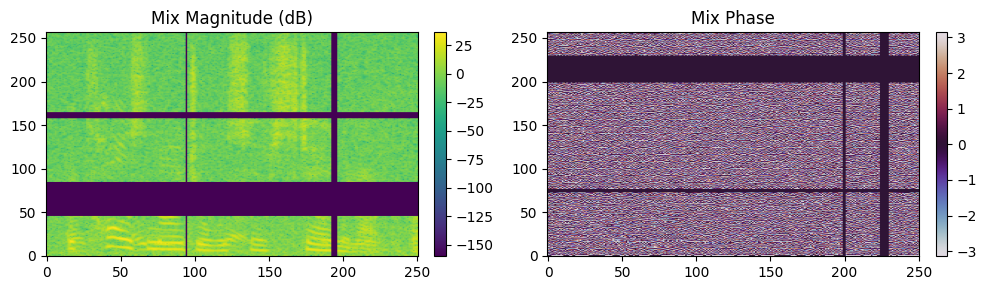

🎧 Source 1:


📊 Source 1 Spectrogram & Phase:


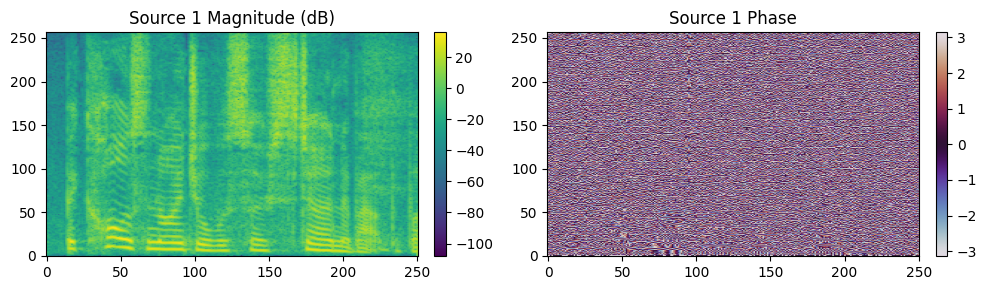

🎧 Source 2:


📊 Source 2 Spectrogram & Phase:


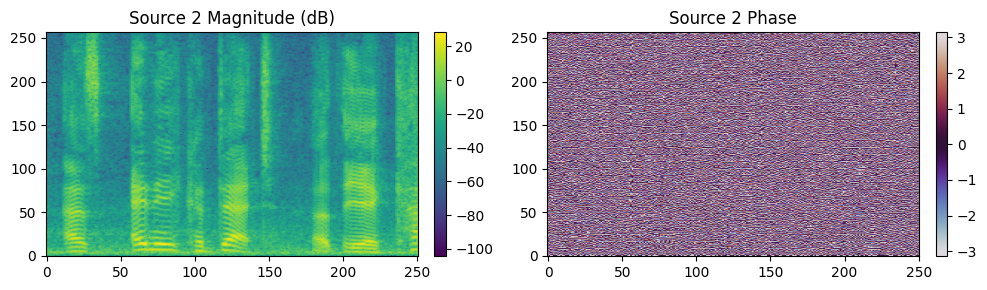

----------------------------------------------------------------------------------------------------
🔹 Sample #1606
🎧 Original Mix:


🎧 Augmented Mix:


📊 Mix Spectrogram & Phase:


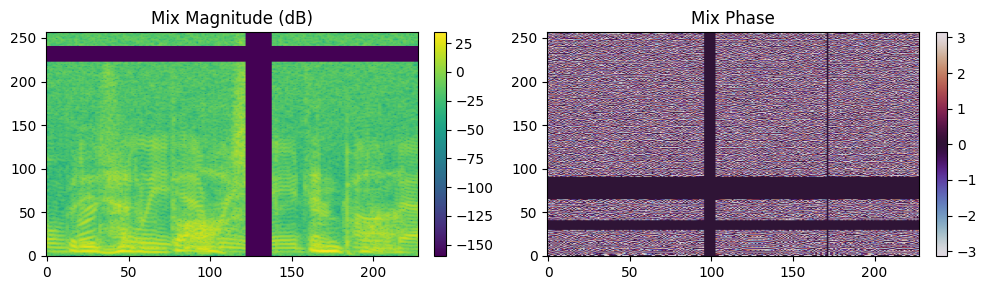

🎧 Source 1:


📊 Source 1 Spectrogram & Phase:


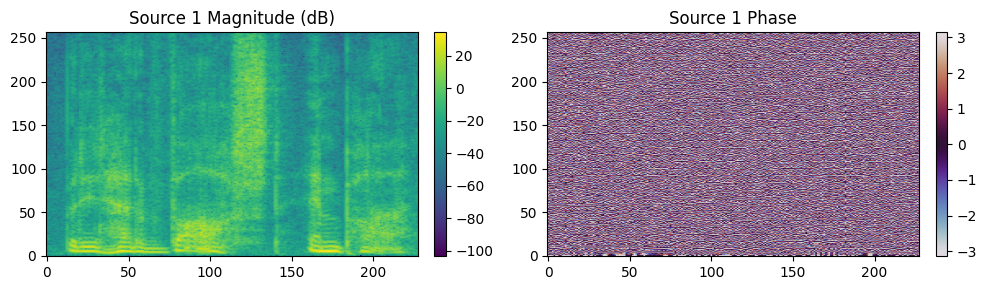

🎧 Source 2:


📊 Source 2 Spectrogram & Phase:


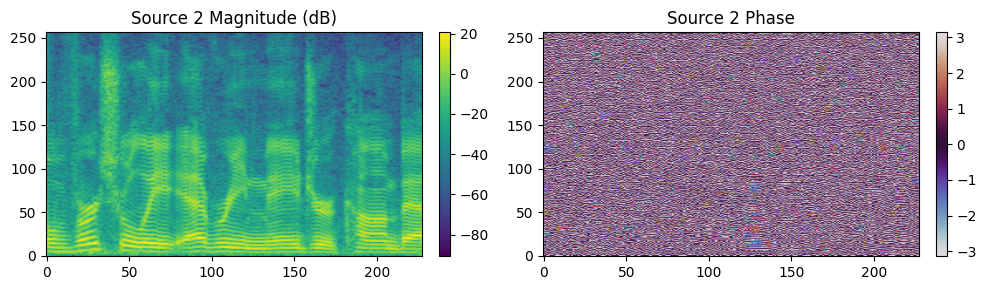

----------------------------------------------------------------------------------------------------


In [6]:
listen_samples(dataset, k=2, sample_rate=dataset.target_sr)

## Test collate_fn

In [7]:
%load_ext autoreload
%autoreload 2

from src.datasets.collate import collate_fn

In [8]:
import random
k = 10
indices = random.sample(range(len(dataset)), k)
examples = [dataset[idx] for idx in indices]

In [9]:
len(examples)

10

In [10]:
examples[0]["audio"].shape, examples[1]["audio"].shape

(torch.Size([1, 29091]), torch.Size([1, 29091]))

In [11]:
batch = collate_fn(examples)

In [41]:
batch.keys()

dict_keys(['spectrogram', 'phase', 'spectrogram_length', 'audio', 'audio_length', 'sources', 'audio_original', 'audio_path', 'preds', 'loss', 'batch_permuts'])

In [42]:
batch['audio_path']

['/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00668290812_00978964977.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00686831197_00448830802.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00705699323_00134887609.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00609659090_00420528885.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00321025097_00902369289.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00245031258_00897976470.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00282744630_00465598680.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00545961471_00897976470.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00445521264_00392765666.wav',
 '/media/atem/Data/HSE_video

In [13]:
batch['spectrogram'].shape, batch['spectrogram_length'], batch['audio_length']

(torch.Size([10, 257, 278]),
 tensor([228, 228, 251, 251, 228, 228, 251, 278, 228, 228]),
 35556)

In [14]:
batch['audio'].shape, batch['audio_length']

(torch.Size([10, 35556]), 35556)

In [15]:
len(batch['sources'])

2

In [16]:
batch['sources'][0].keys()

dict_keys(['audio', 'spectrogram', 'phase'])

In [17]:
batch['sources'][0]["spectrogram"].shape

torch.Size([10, 257, 278])

In [18]:
batch['sources'][0]["audio"].device

device(type='cpu')

## Test Batch to Device

In [19]:
import torch
def move_batch_to_device(device, batch):
    """
    Move all necessary tensors to the device.

    Args:
        batch (dict): dict-based batch containing the data from
            the dataloader.
    Returns:
        batch (dict): dict-based batch containing the data from
            the dataloader with some of the tensors on the device.
    """
    for tensor_for_device in ["spectrogram", "phase", "sources", "audio", "audio_length"]:
        if isinstance(batch[tensor_for_device], torch.Tensor):
            batch[tensor_for_device] = batch[tensor_for_device].to(device)
        if isinstance(batch[tensor_for_device], list):
            for item in batch[tensor_for_device]:
                if isinstance(item, torch.Tensor):
                    item = item.to(device)
                if isinstance(item, dict):
                    for k, v in item.items():
                        item[k] = v.to(device)
    return batch

In [20]:
device = 'cuda'

In [21]:
batch = move_batch_to_device(device, batch)

In [22]:
batch["sources"][0]["spectrogram"].device

device(type='cuda', index=0)

## Test Baseline Model

In [23]:
from src.model import BaselineModel

In [24]:
baseline_model = BaselineModel(n_feats=257)
baseline_model.to(device)

BaselineModel(
  (source_nets): ModuleList(
    (0-1): 2 x BaselineModelBlock(
      (net_spec): Sequential(
        (0): Linear(in_features=257, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=257, bias=True)
      )
      (net_phase): Sequential(
        (0): Linear(in_features=257, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=257, bias=True)
      )
    )
  )
)

In [25]:
model_out = baseline_model(**batch)
batch.update(model_out)


In [26]:
batch.keys()

dict_keys(['spectrogram', 'phase', 'spectrogram_length', 'audio', 'audio_length', 'sources', 'audio_original', 'audio_path', 'preds'])

In [27]:
batch["preds"][0].keys()

dict_keys(['audio', 'spectrogram', 'phase'])

## Test Loss

In [28]:
from src.loss import DTTNetLoss
spec_loss = DTTNetLoss()

In [29]:
loss_spectrum = spec_loss(
    audio_pred = batch["preds"][0]["audio"], 
    spectrogram_pred = batch["preds"][0]["spectrogram"], 
    phase_pred = batch["preds"][0]["phase"],
    audio_true = batch["sources"][0]["audio"], 
    spectrogram_true = batch["sources"][0]["spectrogram"], 
    phase_true = batch["sources"][0]["phase"], 
)

In [30]:
loss_spectrum

tensor([2.0897, 1.8730, 2.4711, 2.2042, 2.7431, 3.2657, 2.5263, 2.6305, 1.6223,
        1.9571], device='cuda:0', grad_fn=<AddBackward0>)

## Test PIT Loss Wrapper

In [31]:
# from src.loss.pit_loss_wrapper import PITLossWrapper
with initialize(config_path="../configs", version_base=None):
    cfg = compose(config_name="baseline.yaml")
    pit_loss = instantiate(cfg.loss_function)

In [32]:
loss = pit_loss(**batch)
loss

{'loss': tensor(4.6441, device='cuda:0', grad_fn=<MeanBackward0>),
 'batch_permuts': tensor([[1, 0],
         [1, 0],
         [0, 1],
         [1, 0],
         [1, 0],
         [1, 0],
         [1, 0],
         [1, 0],
         [1, 0],
         [1, 0]], device='cuda:0')}

In [33]:
batch.update(loss)

In [34]:
batch.keys()

dict_keys(['spectrogram', 'phase', 'spectrogram_length', 'audio', 'audio_length', 'sources', 'audio_original', 'audio_path', 'preds', 'loss', 'batch_permuts'])

In [35]:
batch["preds"][0]["audio"].shape

torch.Size([10, 35556])

## Test Metrics

In [36]:
from src.metrics.si_snr_i_PIT_wrapper import SiSnrIPITWrapper
from src.metrics.si_snr_i import SiSnrI
from src.metrics.si_snr import SiSnr

In [37]:
si_snr = SiSnr()

In [38]:
pred_audio_batch = batch['preds'][0]['audio']
true_audio_batch = batch['sources'][0]['audio']
si_snr(pred_audio_batch, true_audio_batch)

tensor([-14.9219, -16.9838, -25.6168, -31.9482, -27.8124, -26.9322, -26.5671,
        -39.3256, -31.0684, -29.3097], device='cuda:0', grad_fn=<MulBackward0>)

In [39]:
metric_wrapper = SiSnrIPITWrapper()

In [40]:
metric_wrapper(**batch)

tensor(-64.1434, grad_fn=<MeanBackward0>)